# Session 5

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

---
## Clustering

#### Worldbank data
https://data.worldbank.org/

In [11]:
df_urban = pd.read_csv('data/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_200798.csv', skiprows=4)
df_age = pd.read_csv('data/API_SP.POP.DPND.YG_DS2_EN_csv_v2_224716.csv', skiprows=4)

In [12]:
df_age.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,81.697886,80.208889,78.931877,77.661358,76.107011,74.221247,...,30.322774,29.804396,29.125267,28.351007,27.625641,27.043319,26.407470,26.078518,25.933470,NaN
1,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,76.535066,77.558548,78.149745,78.488542,78.790092,79.142619,...,97.341930,95.510252,93.202852,90.611139,87.926203,85.245772,83.205805,81.249828,79.319383,NaN
2,Angola,AGO,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,76.797867,79.002047,81.394888,83.443377,84.591596,84.738019,...,92.971970,93.340663,93.516764,93.528338,93.383510,93.072836,92.833720,92.413034,91.827756,NaN
3,Albania,ALB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,73.770305,74.983787,76.174266,77.247385,78.014140,78.351472,...,33.565374,31.802866,30.289696,29.041102,28.018308,27.172429,26.774948,26.264034,25.768823,NaN
4,Andorra,AND,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select just year 1980:

In [13]:
year = '1980'

In [5]:
df_u = df_urban[['Country Name', year]]

In [6]:
df_a = df_age[['Country Name', year]]

In [7]:
df_a

,Country Name,1980
0,Aruba,39.790236
1,Afghanistan,89.869218
2,Angola,89.833098
3,Albania,61.276472
4,Andorra,NaN
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",104.626458
261,South Africa,73.919303
262,Zambia,99.160008


In [8]:
df = df_u.merge(df_a, on='Country Name', suffixes=['_u', '_a'])

In [9]:
df

,Country Name,1980_u,1980_a
0,Aruba,50.472,39.790236
1,Afghanistan,15.995,89.869218
2,Angola,24.298,89.833098
3,Albania,33.762,61.276472
4,Andorra,92.064,NaN
...,...,...,...
259,Kosovo,NaN,NaN
260,"Yemen, Rep.",16.534,104.626458
261,South Africa,48.425,73.919303
262,Zambia,39.815,99.160008


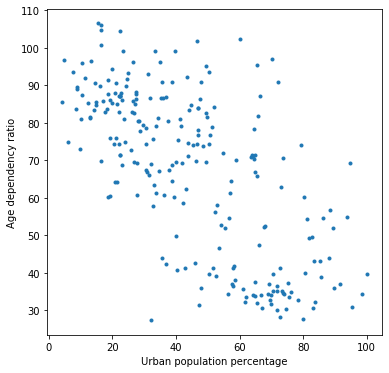

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot(df['1980_u'], df['1980_a'], '.')
ax.set_ylabel('Age dependency ratio')
ax.set_xlabel('Urban population percentage');

---
#### Perform clustering (with 2 clusters)

In [19]:
kmeans = KMeans(n_clusters=2)

In [26]:
X = df[['1980_u', '1980_a']].dropna()

In [27]:
X

,1980_u,1980_a
0,50.472000,39.790236
1,15.995000,89.869218
2,24.298000,89.833098
3,33.762000,61.276472
5,44.846576,84.704212
...,...,...
258,21.173000,90.635085
260,16.534000,104.626458
261,48.425000,73.919303
262,39.815000,99.160008


In [28]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

[[68.10607505 44.73335979]
 [30.52748687 81.75938478]]


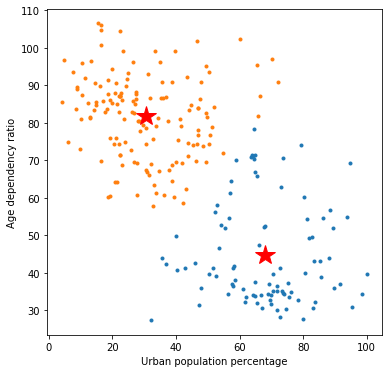

In [30]:
cc = kmeans.cluster_centers_
print(cc)

fig, ax = plt.subplots(1, 1, figsize=(6,6))

for cluster in [0,1]:
    X_cluster = X[kmeans.labels_ == cluster]
    ax.plot(X_cluster['1980_u'], X_cluster['1980_a'], '.')
    ax.plot(cc[cluster][0], cc[cluster][1], '*', color='r', markersize=20)
ax.set_ylabel('Age dependency ratio')
ax.set_xlabel('Urban population percentage');